In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [ ]:
# Notes on SQLAlchemy

# SQLAlchemy ORM- ORM = Object Relational Mapper.  Allows you to create classes in your code that can be mapped
# to specific tables in a given database. This allows us to create a special type of system: **decoupled system**

# Understanding ORMs: consider a bunch of wires and rope tightly knotted together.  You can't seperate them easily because 
# of the tangle- this is a **TIGHTLY COUPLED SYSTEM**- all different ropes are connected to each other, so if you try to grab
# one rope/wire, you get the whole mess of them.

# what an ORM does is detangle (DECOUPLE) all those ropes/wires so we can use one at a time.  So if one element breaks, it
# doesn't affect any of the other cords.

# GENERALLY SPEAKING: the less coupling in our code, the better. The more coupling you have, the more the entire system
# will be affected if one aspect errors out- everything will break.

In [5]:
# Bottom line on ORM- keeps systems *decoupled*.  

# Our references will be to *classes* in our code instead of specific tables in the database. 

# We'll be able to influence each class independently.


# Reflect Tables into SQLAlchemy ORM

In [5]:
# SQLAlchemy Create Engine

# CREATE ENGINE function in SQLAlchemy primary purpose is to setup the ability to QUERY a SQLlite database.

# In order to connect to the SQLite database, need to use CREATE_ENGINE() function. **this func. just prepares the database 
# file to be connected later on.  
# the create_engine() func. usually just has one paramter -> which is the location of the SQlite database file.



                            # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# SQLAlchemy Automap Base

# **Automap Base**  creates a base class for an automap scheme in SQLalchemy.Meaning, it sets up the foundation for us
# to build on in SQLAlchemy

# Add the following

Base= automap_base()

In [ ]:
# SQLAlchemy Reflect Tables 

# Can now reflect our tables with the *prepare()* function.  By adding this code, we'll reflect the schema of our SQLite tables
# into our code and create mappings.

### IMPORTANT: Recall when talking about keeping our code decoupled in the above notes.  When we REFLECT tables,
### we're creating CLASSES that keep our code separate. This ensures that if other classes or systems want to interact
### with it, they can ONLY INTERACT with specific subsets of data instead of the entire dataset.

In [7]:
# reflect an existing database into a new model

# reflect the tables
Base.prepare(engine, reflect= True)

# Now that we've reflected our database tables, we can check out the CLASSES we'll be creating with Automap.

In [ ]:
# Once we've added the *Base.prepare() func. need to confirm that the Automap was able to find all the data 
# in the SQLite database.  

# Check this by using **Base.classes.keys()
#      This code references the classes that were mapped in each table.

# Base.classes -> gives us access to all the classes]
# keys() -> references all the names of the classes.

In [ ]:
# These classes we've set up help keep our data seperate (DECOUPLED).  Our data is no longer stored in tables, but in CLASSES.
# The code we'll run below allows us to pretty much copy, or REFLECT, our data into different classes instead of database tables

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table

# In order to reference a specific class, we use **Base.classes.<class name>  
# so if we wanted to reference the *station* class, we would do -> Base.classes.station

# Since it's cumbersome to type Base.classes every time we want to reference the *measurement* or *station* classes,
# we can give classes new variable names.  Creating new references for the two classes.

Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB

# Use an SQLAlchemy Session to query our database.  Our session essentially allows us to query for data.

session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
##### 9.2.1 RETRIEVE DATA ######

In [11]:


prev_year = dt.date(2017, 8, 23)  # This code specifies the most recent date, but we want to calculate the date 1 YEAR back.
# to do so, add dt.timedelta() func to the code.  This function allows us to trace back a certain number of days.
# what you pass into dt.timedelta() is the number of days you want to look back.

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the last data point in the database. 



# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365) # date is 2016, 8, 23



In [13]:
# Perform a query to retrieve the data and precipitation scores

# begin by creating a variable to store the results of the query we'll write.  call it results.

results = []

# next, add our session that we created earlier so taht we can query our database.  Use the session.query() func.
# **session.query()** is how we'll begin all of our queries in SQLalchemy.  
# from a birds-eye view, this is how we query a SQLite database USING PYTHON.

# The session.query() func. for this query takes (2) parameters.
# reference the Measurement table using *Measurement.date* and *Measurement.prcp*

results = session.query(Measurement.date, Measurement.prcp)
print(results.all())

# prints a bunch of data. FILTER out all the data that is older than a year from the last record date.  
# use filter() function to filter out the data we DONT need.  Add filter() func to query.

# results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

#      the filter here works by saying the Measurement.date has to be newer (more recent) than prev_year which is 
#      August 13, 2016.

# ONE LAST THING TO ADD
# Add a function that extracts ALL of the results from our query and puts them into a LIST.  
# to do so, add **.all()** at the end of query.

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# add print() to get output
print(results)

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [14]:
# ONE LAST THING TO ADD
# Add a function that extracts ALL of the results from our query and puts them into a LIST.  
# to do so, add **.all()** at the end of query.

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# add print() to get output
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [15]:
##### 9.2.2 #### Save Query Results #####

# Save the query results as a Pandas DataFrame and set the index to the date column

# in order to save our results as a DataFrame, need to provide our RESULTS variable as one parameter 
# and specify the COLUMN NAMES as our second parameter.

df = pd.DataFrame(results, columns= ["date", "precipitation"])
df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [21]:
# Use the set_index() Function | 9.2.2

# We want the index column to be the DATE column (not the auto generated row number index). Gotta get rid of the row numbers.
# to do this, set the INDEX to the DATE COLUMN.

#### REMINDER: we can use the variable *inplace* to specify whether or not we want to create a new DataFrame. #####
# in this case, we're going to use the same DataFrame, 
# so by setting inplace=True |||| we're saing we DO NOT want to create a new DataFrame with the modified specs.

# IF we set it to "False" then we would create a new DataFrame.

df.set_index(df["date"], inplace=True)
df

# "date" is now serving as the index.

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56


In [16]:


# B/c we're using the "date" as the index, the DataFrame has two date columns, which we don't want.
# print hte dataframe w/o the index so we can see just the "date" and "precipitation"

# to do this, first we'll convert the DataFrame to strings, and then we'll set our index to "False".
# this will allow us to print the DataFrame without the index.

print(df.to_string(index=False))

# nice.  however, the dates aren't in chronological order. gotta fix that.

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

In [27]:
##### Sort the dataframe by date | 9.2.3 |

# going to sort the values (the date column(INDEX)-> ex: 2016-09-09) by using the **sort_index()** function.
# since we set our index to the date column already, we can use our new index to sort our results.

df= df.sort_index()
df

# print like we had it in above cell using the -> print(df.to_string(index =False))
print(df.to_string(index =False))

# now all dates are in order!

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

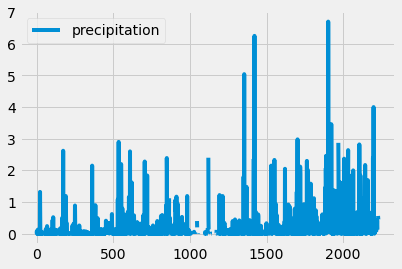

In [17]:
#### 9.2.4 #### PLOT THE DATA #### 9.2.4 ##### PLOT THE DATA

#                         Use Pandas Plotting with Matplotlib to plot the data

# since our DataFrame is represented as the variable "df" we can use df.plot() function.

# x= df["precipitation"]
# plt.xticks(rotation="vertical")
df.plot()

In [ ]:
#### 9.2.5 #### Generate the summary #### 9.2.5 #####

# quick refresher on key concepts-

# VARIANCE: How far a set of numbers is from the average (mean)

# STANDARD DEVIATION: A measure of how spread out the numbers are in a dataset-> square root of the variance.

# MINIMUM: smallest number in dataset

# MAXIMUM: largest number in dataset.

# PERCENTILES: Where the number is in relation to the rest of the set of data.

# COUNT: the TOTAL number of numbers/items in a dataset.

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data | 9.2.5

# use describe() to calc. -> Mean, minimum, maximum, standard eviation, precentiles.

df.describe()

# FYI- COUNT(2021) is the number of times precipitation was observed.

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
#### 9.3.1 #### 9.3.1 #### Find the Number of Stations #### 9.3.1 #### 9.3.1 ####


In [19]:
#                              How many stations are available in this dataset?

# need to write a QUERY to get the number of stations in our dataset.  We'll use our session that we created earier to query DB

session.query()

# use *func_count* ---> essentially counts a given dataset that we're looking at.  In this case, we want to count # of stations.
# can do this by referencing: Station.station -> which gives you the number of stations.

session.query(func.count(Station.station))

# now just need to add the *all()* function at the end of query so that results returned as a LIST.

session.query(func.count(Station.station)).all()
# output = [(9)] stations

[(9)]

In [ ]:
#### 9.3.2 #### 9.3.2#### 9.3.2 # Determine the most active stations #### #### 9.3.2 #### 9.3.2

In [20]:
                     #### Mesing around with session.query() to figure it out a bit. ######
session.query(Measurement.station).all()

[('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC0051

In [21]:
# Start to determine active stations.

# Begin with the function we use to start every query in SQLAlchemy

session.query()

# Next, need to add a few parameters. list the stations and the counts-

session.query(Measurement.station, func.count(Measurement.station))

# Add a few FILTERS to narrow down the data to show only what we need.
# using Groupby() function on: Measurement.station will give us the count per station

# We want to group the data by the STATION NAME, then
# ORDER by the COUNT for each station in descending order.  Going to add group_by() first

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)

# Now let's add the Order_by function.  
# Order_by will order our results in the order that we specify-> which we want in descending order.  
# Our query results will be returned as a list.

# add this: order_by(func.count(Measurement.station).desc())

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

# NEXT: we need to add the ".all()" function here as well. this will return all results in query

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# OUTPUT = Left colum is the STATION ID and Right column are the COUNTS for each station.

# What are the most active stations?
# List the stations and the counts in descending order.

# [('USC00519281', 2772),
#  ('USC00519397', 2724),
#  ('USC00513117', 2709),
#  ('USC00519523', 2669),
#  ('USC00516128', 2612),
#  ('USC00514830', 2202),
#  ('USC00511918', 1979),
#  ('USC00517948', 1372),
#  ('USC00518838', 511)]

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
#### 9.3.3 #### 9.3.3 #### Find Low, High and Average Temperatures #### 9.3.3 #### 9.3.3 ####

In [22]:
# Avery is interested in the MOST ACTIVE station... -> USC00519281 (from above query)

session.query()

# calculate the minimum, maximum, and avg. temperatures with the following: func.min, func.max, func.avg

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))

# Avery only wants the most ACTIVE station USC00519281, so filter out all other stations.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281')
              
# Finally, add the ".all()" function to return our results as a list.
              
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

# output = [(54.0, 85.0, 71.66378066378067)]

[(54.0, 85.0, 71.66378066378067)]

In [23]:
# Using the station id from the previous (9.3.2) query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

# output = [(54.0, 85.0, 71.66378066378067)]

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
#### 9.3.4 #### 9.3.4 #### 9.3.4 #### PLOT THE HIGHEST NUMBER OF OBSERVATIONS #### 9.3.4 #### 9.3.4 ####

# Need to make a plot that shows all the temperatures in a given year for the station w/ highest # of temperature observations.

In [24]:
# CREATE THE QUERY 

# We want the to pull Measurement.tobs in order to get our total observations count (aka, tobs)

session.query(Measurement.tobs)

# Now we want to filter out all stations that aren't == 'USC00519281'

results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')

# Need to apply another filter to consider ONLY the most recent year.  

results = session.query(Measurement.tobs).filter(Measurement.station =='USC00519281').filter(Measurement.date >= prev_year)

# Finally, add in the *.all()* function to to save the variable "results" as a list.

results = session.query(Measurement.tobs).filter(Measurement.station =='USC00519281').filter(Measurement.date >= prev_year).all()

In [45]:
print(results)

# make sure you use print! just using RESULTS (the variable) gives you a long ass list that you gotta scroll through.

# Also, not super easy to read...put into a DataFrame.

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [25]:
# Convert the Temperature Observation Results to a DataFrame. #### 9.3.4 still ####

# REMINDER: When creating a DataFrame, our first parameter is our list, and second parameter is the column(s) we want to
# put our data in.  
# In this case, we want to put our TEMPERATURE OBSERVATIONS result list into a dataframe.


# df1 = pd.DataFrame(results, columns=["Temperature Observations"])
# that works...but just to match the syntax that the module uses... note it out and run the code below instead.

df = pd.DataFrame(results, columns=["tobs"])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


In [50]:
# Extra- remove the index column in "df"

# Going to use set_index() function

df.set_index(df["tobs"])

# print w/o index

print(df.to_string(index=False))

 tobs
 77.0
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.

In [ ]:
#                   Choose the station with the highest number of temperature observations.

## That's station 'USC00519281' but we did that coding up a few cells...


In [ ]:
#                   Query the last 12 months of temperature observation data for this station

# like above, wrote this code...

# session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
# filter(Measurement.station == 'USC00519281').all()

# to get the data, and then converted into a DataFrame- "df"

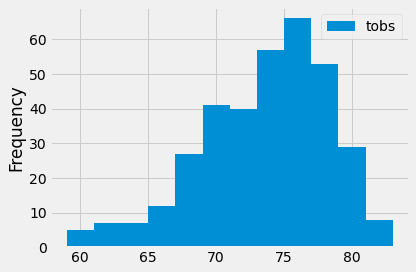

In [26]:
#                                   plot the results as a histogram

# REMINDER: A Histogram is a graph made up up a range of data that is seperated into different bins.

# When making a histogram, need to know how many bins you need. (stay within a range of 5-20 is considered best)

# going to divide our "tobs" into 12 bins. 
# *** we DONT need to specify the RANGES in which the data will be seperated, just need to specify the NUMBER of bins.

# To create the histogram, need to use the plot() function and the hist() function and add the number of bins as a parameter.

df.plot.hist(bins=12)

# using the plt.tight_layout() we can COMPRESS the x-axis labels so that they fit nicely into the box holding the plot.
#### EXTREMLY USEFUL WHEN THE X-AXIS DOESNT FIT INTO THE BOX ####
plt.tight_layout()

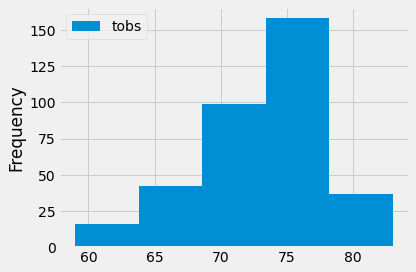

In [27]:
# Skill drill part 1 - change number of bins to 5
df.plot.hist(bins=5)
plt.tight_layout()

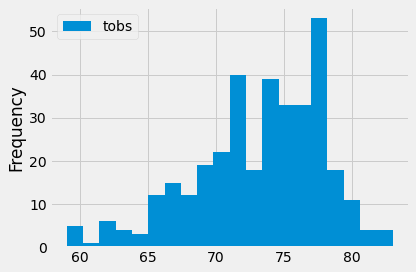

In [28]:
# Skill drill part 2 - change number of bins to 20
df.plot.hist(bins=20)
plt.tight_layout()

# so the more bins you have, the more defined the data presents itself.  But, it can become harder to read if you have too many.

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


In [ ]:
##### 9.5.1 IS IN VS CODE UNDER surfs_up file!!!! app.py ##### 9.5.1 #####

In [ ]:
# FLASK -> Makes it possible to summarize the key ideas of your code in a way that people who don't care about the code can see.

# Useful on the job search to show what your code can do!

# Challenge